# Zipline Backtest and Pyfolio Tearsheet with `up_minus_down.py` algo

*This example notebook is part of QuantRocket's [Getting Started with Equities](https://www.quantrocket.com/tutorials/equities/) tutorial series.*

*The notebook assumes that you've already created a historical price database called "demo-stocks-1d". Please refer to the tutorial series if you haven't completed this step.*

This notebook shows how to run a Zipline backtest using QuantRocket then analyze the backtests results inside the notebook using pyfolio.

## Step 1: Ingest Historical Data into Zipline
First we ingest our history database into Zipline:

In [1]:
from quantrocket.zipline import ingest_bundle
ingest_bundle(history_db="demo-stocks-1d")

{'msg': 'successfully ingested demo-stocks-1d bundle', 'status': 'success'}

## Step 2: Run the Algo

In [2]:
from quantrocket.zipline import run_algorithm
import pandas as pd
import pyfolio as pf
import io

Next, run the backtest. We'll run the `up_minus_down.py` demo file from QuantRocket's [codeload-demo GitHub repo](https://github.com/quantrocket-llc/codeload-demo/tree/master/zipline). 

QuantRocket returns the Zipline backtest results as a CSV, which we write to an in-memory file using `StringIO`.

(Note that the backtest runs on the zipline service/container, not inside the jupyter service/container, i.e. not in the notebook environment itself. QuantRocket's jupyter service doesn't support running Zipline backtests via the `%%zipline` extension.)

In [3]:
f = io.StringIO()
run_algorithm("up_minus_down.py", 
              bundle="demo-stocks-1d",
              start="2013-02-01", 
              end="2015-12-31",
              filepath_or_buffer=f)

## Step 3: Create Tear Sheet

The CSV result file returned by `run_algorithm` contains several DataFrames stacked into one: the Zipline performance results, plus the extracted returns, transactions, positions, and benchmark returns from those results. We can use the ZiplineBacktestResults utility class to parse the CSV into the respective DataFrames pyfolio expects.

Note that providing our benchmark returns to pyfolio is optional. If we don't do so, pyfolio will attempt to download benchmark data from a publicly available source.

In [4]:
from quantrocket.zipline import ZiplineBacktestResult
zipline_results = ZiplineBacktestResult.from_csv(f)
print(zipline_results.returns.head())

date
2013-02-01 00:00:00+00:00    0.000000
2013-02-04 00:00:00+00:00   -0.000094
2013-02-05 00:00:00+00:00    0.008762
2013-02-06 00:00:00+00:00   -0.009357
2013-02-07 00:00:00+00:00    0.008851
Name: returns, dtype: float64


Now we can generate our pyfolio tearsheet.

Entire data start date: 2013-02-05
Entire data end date: 2015-12-31
Backtest months: 34


,Backtest
Annual return,18.8%
Cumulative returns,65.0%
Annual volatility,14.2%
Sharpe ratio,1.28
Calmar ratio,1.15
Stability,0.54
Max drawdown,-16.4%
Omega ratio,1.24
Sortino ratio,1.95
Skew,0.06


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.38,2014-01-30,2014-04-28,2015-09-22,429
1,5.76,2015-10-27,2015-11-04,2015-11-10,11
2,5.31,2015-12-08,2015-12-31,NaT,NaN
3,5.26,2013-05-15,2013-05-28,2013-07-01,34
4,4.42,2015-10-01,2015-10-16,2015-10-27,19


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


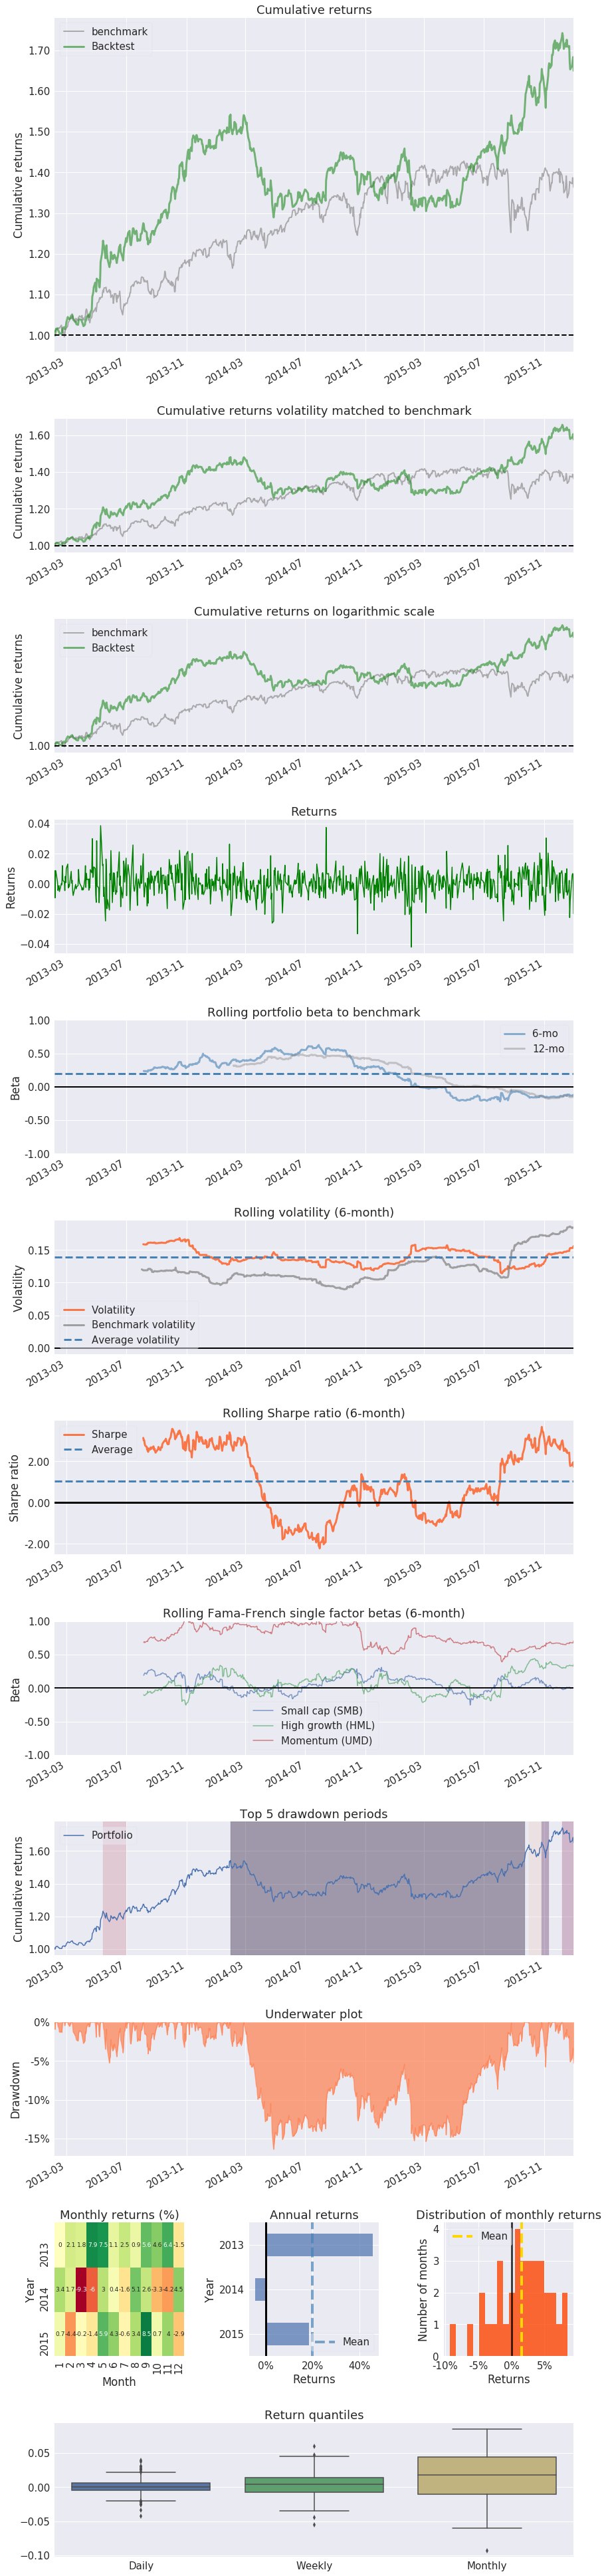

Stress Events,mean,min,max
Apr14,-0.22%,-2.61%,1.88%
Oct14,-0.14%,-3.33%,1.51%
Fall2015,0.32%,-1.39%,2.55%
New Normal,0.07%,-4.21%,3.87%


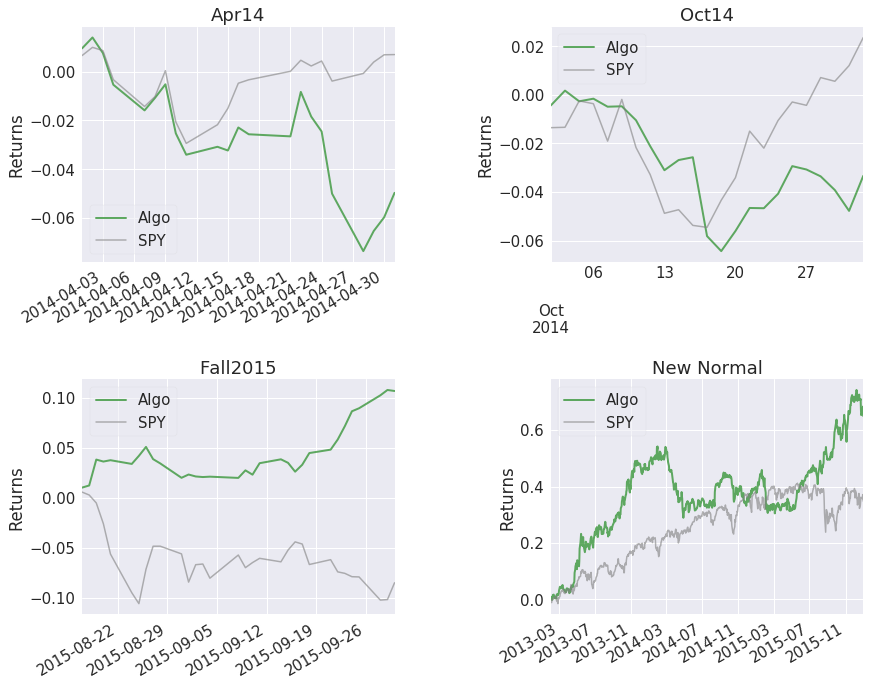

Top 10 long positions of all time,max
column,
Equity(41498671 [CSIQ]),20.32%
Equity(15124833 [NFLX]),17.24%
Equity(3691937 [AMZN]),15.44%
Equity(267892 [COKE]),15.37%
Equity(265598 [AAPL]),14.55%
Equity(274105 [SBUX]),14.11%
Equity(208813719 [GOOGL]),14.08%


Top 10 short positions of all time,max
column,
Equity(41498671 [CSIQ]),-21.62%
Equity(39927629 [EVEP]),-16.39%
Equity(208813719 [GOOGL]),-16.12%
Equity(15124833 [NFLX]),-16.01%
Equity(267892 [COKE]),-15.91%
Equity(3691937 [AMZN]),-15.64%
Equity(265598 [AAPL]),-14.94%
Equity(274105 [SBUX]),-14.42%


Top 10 positions of all time,max
column,
Equity(41498671 [CSIQ]),21.62%
Equity(15124833 [NFLX]),17.24%
Equity(39927629 [EVEP]),16.39%
Equity(208813719 [GOOGL]),16.12%
Equity(267892 [COKE]),15.91%
Equity(3691937 [AMZN]),15.64%
Equity(265598 [AAPL]),14.94%
Equity(274105 [SBUX]),14.42%


All positions ever held,max
column,
Equity(41498671 [CSIQ]),21.62%
Equity(15124833 [NFLX]),17.24%
Equity(39927629 [EVEP]),16.39%
Equity(208813719 [GOOGL]),16.12%
Equity(267892 [COKE]),15.91%
Equity(3691937 [AMZN]),15.64%
Equity(265598 [AAPL]),14.94%
Equity(274105 [SBUX]),14.42%


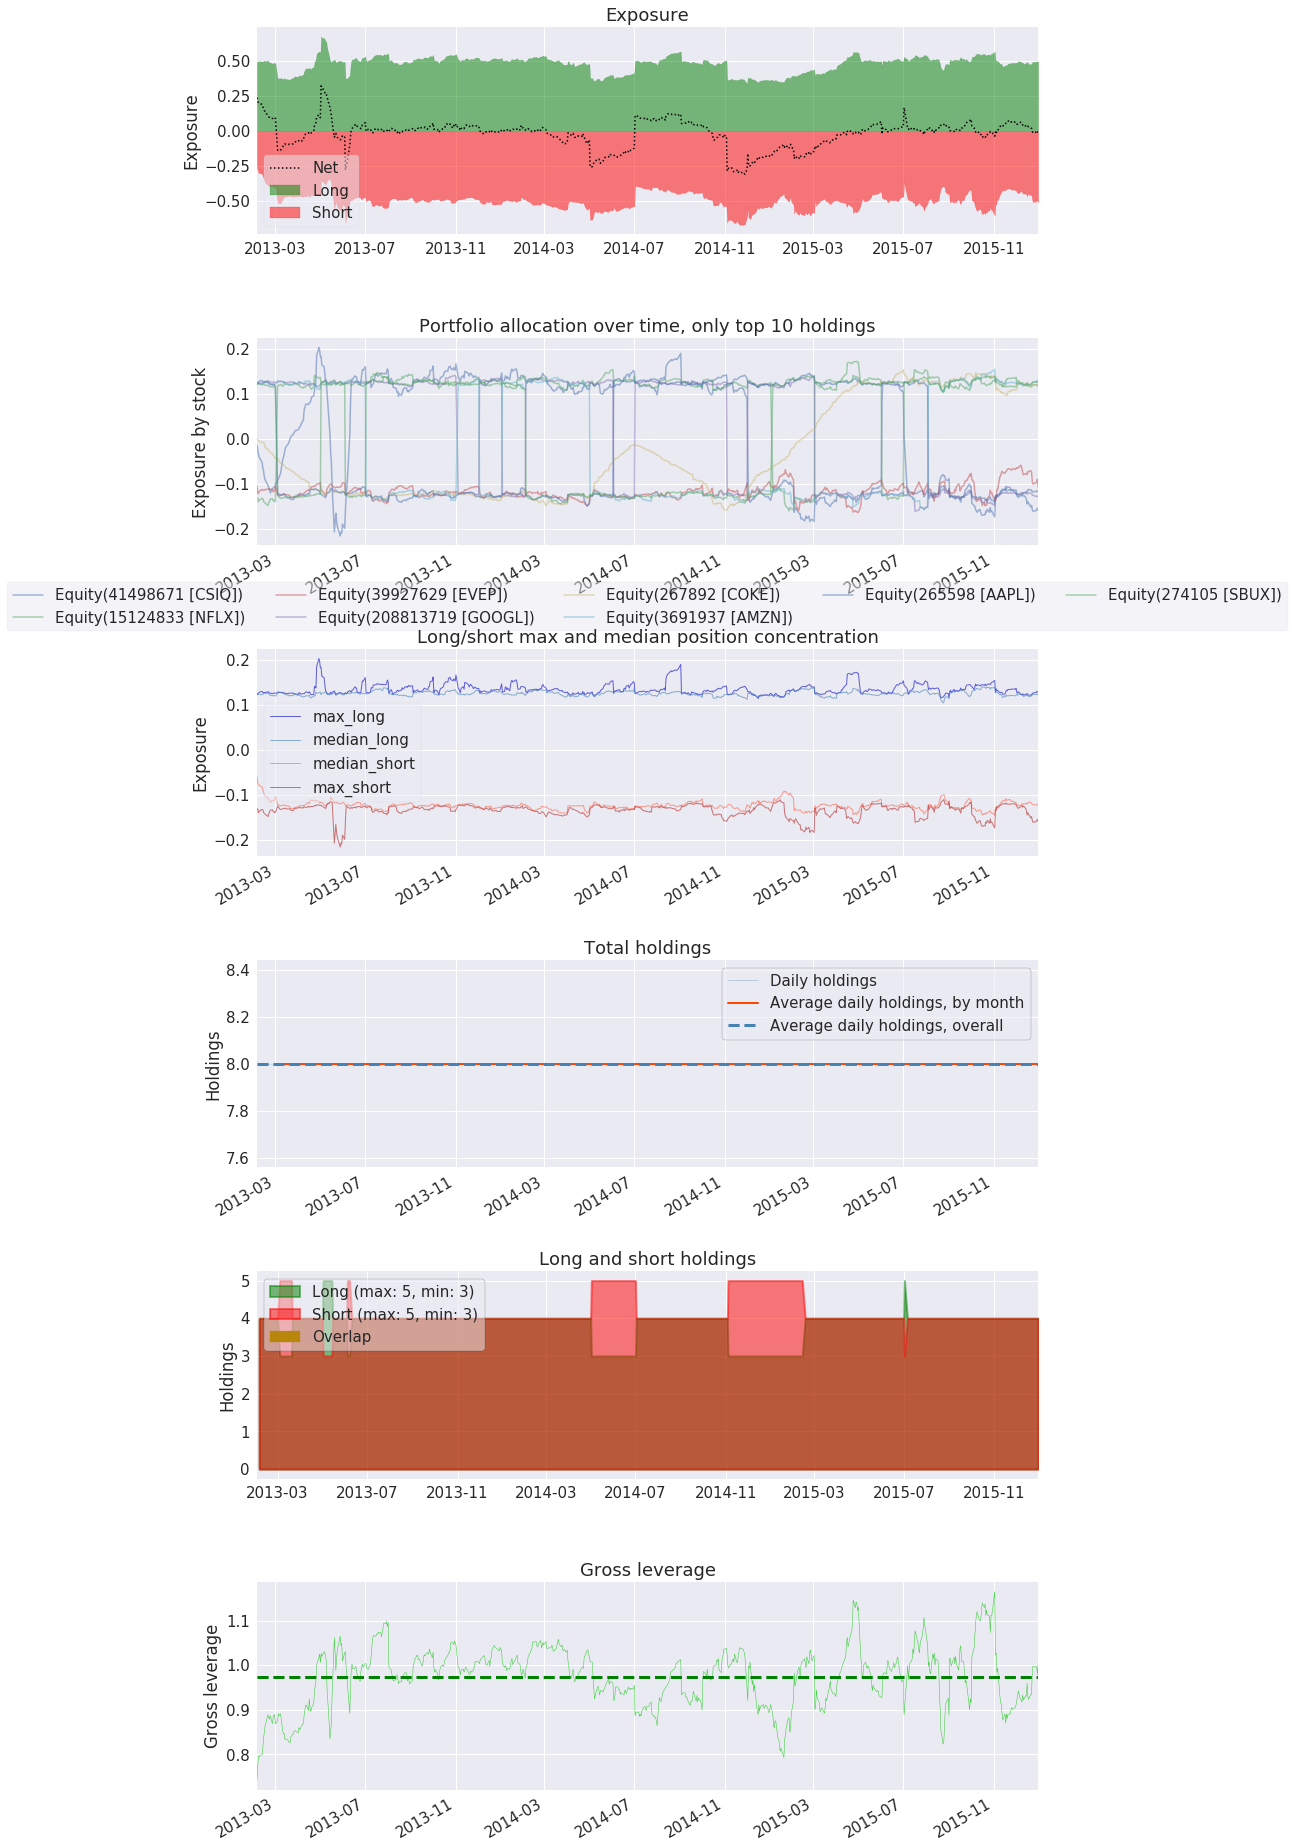

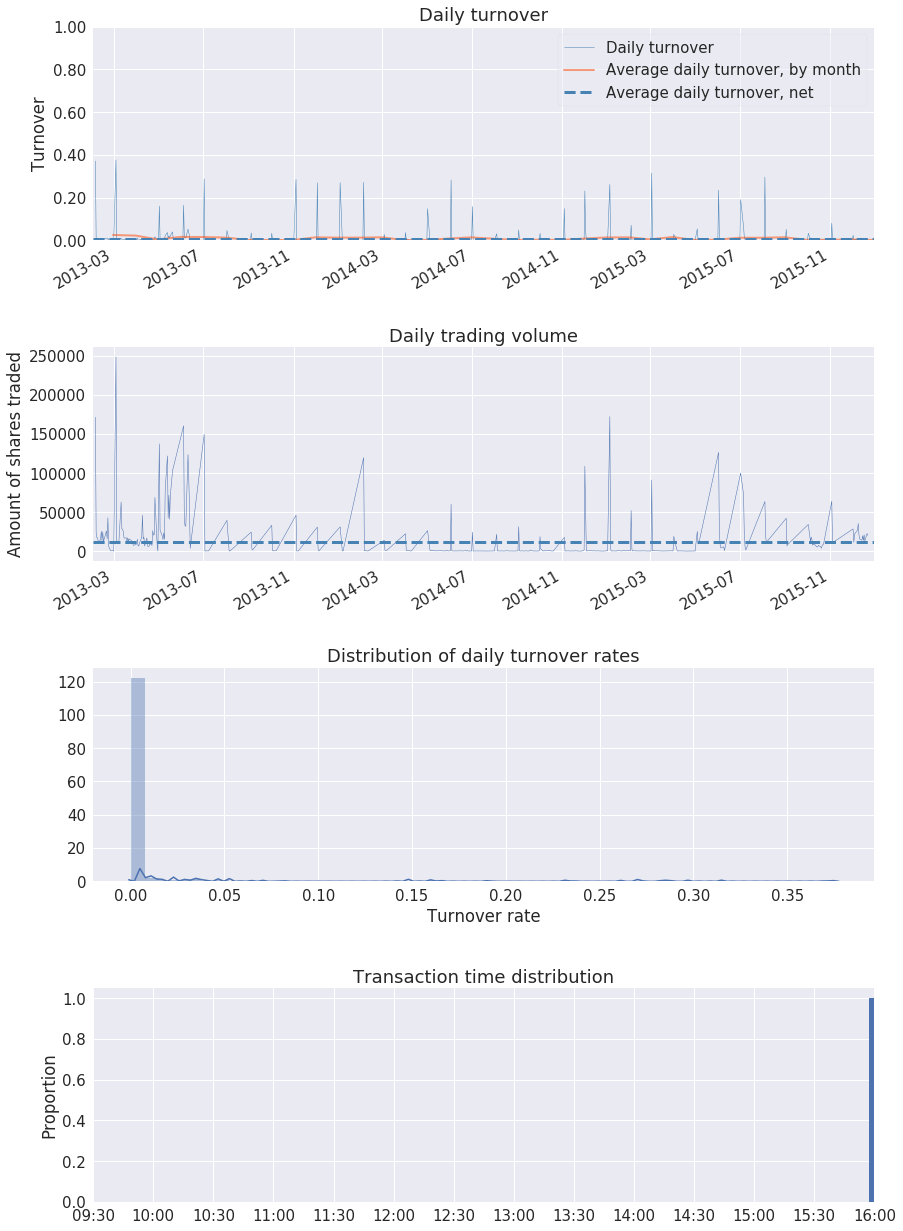

In [5]:
pf.create_full_tear_sheet(
    zipline_results.returns, 
    positions=zipline_results.positions, 
    transactions=zipline_results.transactions, 
    benchmark_rets=zipline_results.benchmark_returns
)

## Optional: Analyze your backtest results  

If you want to explore the Zipline backtest results directly, you can do that as well using the `perf` DataFrame on the `ZiplineBacktestResult` object. 

In [6]:
print(zipline_results.perf.head())

column                     algo_volatility  algorithm_period_return     alpha  \
date                                                                            
2013-02-01 00:00:00+00:00              NaN                 0.000000       NaN   
2013-02-04 00:00:00+00:00         0.001054                -0.000094 -0.011285   
2013-02-05 00:00:00+00:00         0.080742                 0.008668  0.569846   
2013-02-06 00:00:00+00:00         0.117452                -0.000771 -0.212434   
2013-02-07 00:00:00+00:00         0.120206                 0.008073  0.334912   

column                     benchmark_period_return  benchmark_volatility  \
date                                                                       
2013-02-01 00:00:00+00:00                 0.010287                   NaN   
2013-02-04 00:00:00+00:00                -0.001102              0.242018   
2013-02-05 00:00:00+00:00                 0.009018              0.196897   
2013-02-06 00:00:00+00:00                 0.009753  